# Computational Social Choice - Assignment 3
Yorick Juffer - s1993623 \
Ioana Cojocaru - s5002117

## Libraries

In [1]:
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Candidate List

In [2]:
candidate = {
    1: "Jackie Kasabach",
    2: "Jack Johnson",
    3: "Adam Frisch",
    4: "Torre",
    5: "Michael Behrendt",
    6: "Jason Lasser",
    7: "Michael Wampler",
    8: "Derek Johnson",
    9: "Brian D. Speck",
    10: "Write In 1",
    11: "Write In 2"
}

## Functions

### Load
- Loads the data.txt file. 
- The output profile is a list, of which each element contains a vote (profile[n][0]) and preferences (profile[n][1:]).
- Each voters preferences are made unique so (profile[n][0]=1), so they can be easily manipulated. 
- If there is a tie ([1, 2]), both recieve a vote.

In [3]:
def load(path): 
    profile = []

    with open(path, 'r') as file:
        for line in file:
            line = line.strip()

            # for each line, split the votes and preferences
            if line:
                votes_str, preferences_str = line.split(':')
                votes = int(votes_str)

                for _ in range(votes):

                    preferences = []
                    tied_preferences = []
                    tie = False

                    # add the preferences to the profile
                    # split the tied votes and add them as a list to the profile
                    for pref in preferences_str.split(','):
                        pref = pref.strip()

                        if "}" in pref:
                            pref = pref.replace('}', '')
                            tied_preferences.append(int(pref))
                            preferences.append(tied_preferences)
                            tie = False

                        elif "{" in pref or tie:
                            pref = pref.replace('{', '')
                            tied_preferences.append(int(pref))
                            tie = True
                        else:
                            preferences.append(int(pref))

                    # add the votes and preferences to the profile
                    profile.append(preferences)

    return profile

### Single Transferable Vote
- This function takes a profile and a list of candidates and returns the winner of the election using the STV social choice function. 
- The profile ranges alternatives from 1 to 11, but this function uses a 0-based index to represent the candidates.

In [4]:
def single_transferable_vote(profile, candidates, print_status=False):
    eliminated_candidates = []

    round = 0
    while len(eliminated_candidates) < len(candidates):

        # reset the round
        round += 1
        tally = [0] * len(candidates)
        for index in eliminated_candidates:
            tally[index] = None
        lowest_votes = 0
        eliminate = []

        if print_status:
            print("---ROUND {}---".format(round))
        # tally the votes for each candidate
        for pref in profile:

            n = 0
            # search for the candidate with the highest preference that has not been eliminated
            searching = True
            while searching:

                # if the preference is a tie 
                if isinstance(pref[n], list):
                    m = 0

                    # for each tied preference, check if the candidate has been eliminated otherwise tally the votes
                    for _ in pref[n]:

                        if pref[n][m] - 1 in eliminated_candidates:
                            m += 1
                            if m >= len(pref[n]):
                                searching = False
                        else:
                            candidate = pref[n][m] - 1
                            tally[candidate] += 1
                            m += 1
                            if m >= len(pref[n]):
                                searching = False

                # check if the candidate has been eliminated
                elif pref[n] - 1 in eliminated_candidates:
                    n += 1
                    if n >= len(pref):
                        searching = False

                # tally the votes for the candidate
                else:
                    candidate = pref[n] - 1
                    tally[candidate] += 1
                    searching = False

        # eliminate the candidate with the lowest votes
        lowest_votes = min(value for value in tally if value is not None)
        eliminate = [i for i, value in enumerate(tally) if value == lowest_votes]
        eliminated_candidates.extend(eliminate)

        # find the winner
        highest_votes = max(value for value in tally if value is not None)
        winner = [i for i, value in enumerate(tally) if value == highest_votes]

        if print_status:
            print("Tally: {}".format(tally))
            print("Eliminated {}:".format(eliminate))
            print()

    return winner, highest_votes

### Manipulate
- Take in a profile and randomly shuffles n preferences.

In [5]:
def manipulate(profile, n):

    profile_copy = profile.copy()

    for _ in range(n):

        # select a random preference and shuffle it 
        rng = random.randint(0, len(profile_copy)-1)
        manipulated_preference = profile_copy[rng]
        random.shuffle(manipulated_preference)
        profile_copy[rng] = manipulated_preference

    return profile_copy

### Find Minimum

In [6]:
def find_minimum(profile, original_results, n, i):
        
        profile_copy = profile.copy()
        results = []
    
        while n > 0:
            for _ in range(i):
                manipulated_copy_profile = manipulate(profile_copy, n)
                output = single_transferable_vote(manipulated_copy_profile, candidate)
                results.append([original_results[0] == output[0], n, i])

            n -= 1
            print("Finding minimum for n = {}".format(n))
    
        return results

## Load Data

In [7]:
# load data and convert
file_path = 'data.txt'
original_profile = load(file_path)
profile_length = len(original_profile)

## Results P

In [8]:
# FIND THE WINNER
original_results = single_transferable_vote(original_profile, candidate, print_status=True)
for result in original_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

---ROUND 1---
Tally: [247, 456, 415, 385, 352, 27, 94, 463, 38, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [247, 456, 415, 385, 352, 27, 94, 463, 38, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [247, 460, 416, 394, 355, None, 96, 466, 41, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [253, 464, 422, 396, 365, None, 100, 474, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [259, 478, 433, 416, 383, None, None, 494, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 535, 467, 458, 445, None, None, 547, None, None, None]
Eliminated [4]:

---ROUND 7---
Tally: [None, 620, 557, 552, None, None, None, 671, None, None, None]
Eliminated [3]:

---ROUND 8---
Tally: [None, 801, 672, None, None, None, None, 815, None, None, None]
Eliminated [2]:

---ROUND 9---
Tally: [None, 908, None, None, None, None, None, 1227, None, None, None]
Eliminated [1]:

---ROUND 10---
Tally: [None, None, None, None, None, None, None, 1685, None, None, None]
Eliminated [7]:

Derek Johns

## Results P'

In [9]:
manipulated_profile = manipulate(original_profile, profile_length)
results = single_transferable_vote(manipulated_profile, candidate, print_status=True)
for result in results[0]:
    print("{} wins with {} votes!\n".format(candidate[result + 1], results[1]))

---ROUND 1---
Tally: [304, 351, 369, 377, 311, 109, 175, 367, 109, 4, 2]
Eliminated [10]:

---ROUND 2---
Tally: [304, 352, 369, 377, 312, 109, 175, 367, 109, 4, None]
Eliminated [9]:

---ROUND 3---
Tally: [305, 352, 370, 377, 312, 109, 176, 367, 109, None, None]
Eliminated [5, 8]:

---ROUND 4---
Tally: [340, 382, 400, 412, 350, None, 192, 398, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [362, 400, 434, 448, 383, None, None, 436, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 485, 489, 523, 446, None, None, 508, None, None, None]
Eliminated [4]:

---ROUND 7---
Tally: [None, 566, 576, 628, None, None, None, 629, None, None, None]
Eliminated [1]:

---ROUND 8---
Tally: [None, None, 667, 878, None, None, None, 750, None, None, None]
Eliminated [2]:

---ROUND 9---
Tally: [None, None, None, 1099, None, None, None, 1075, None, None, None]
Eliminated [7]:

---ROUND 10---
Tally: [None, None, None, 1735, None, None, None, None, None, None, None]
Eliminated [3]:

Torre 

## Find

In [ ]:
# find the minimum number of manipulations to change the winner
# n = number of manipulations (to start), i = number of iterations of that manipulation
results = find_minimum(original_profile, original_results, n=profile_length, i=100)

# Define the file path for the CSV file
csv_file_path = 'results.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Match', 'n', 'i'])
    writer.writerows(results)

print("Results saved to {}".format(csv_file_path))

## Analysis

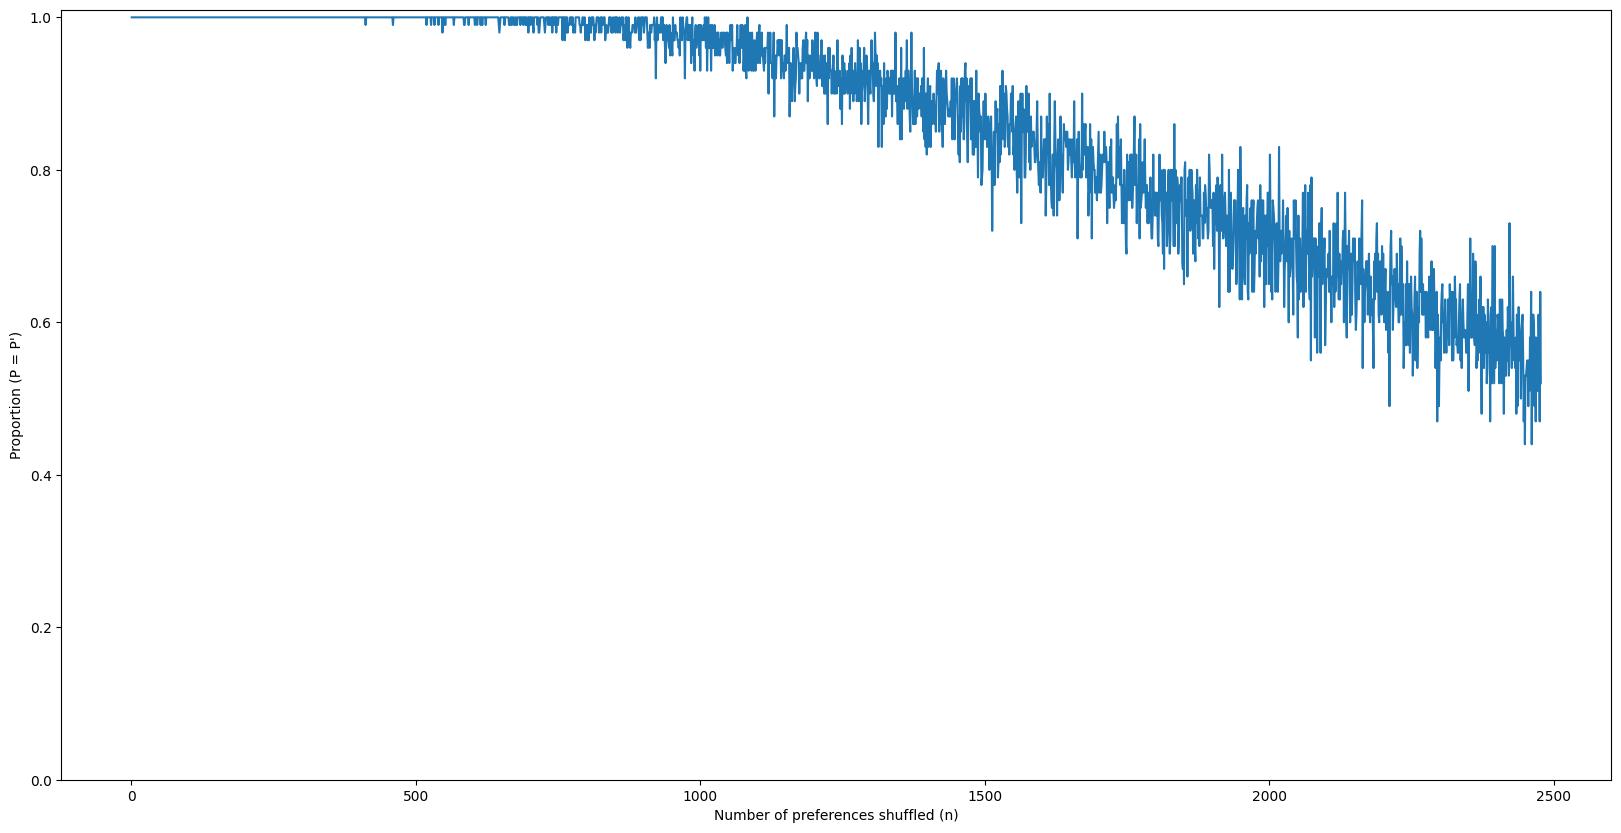

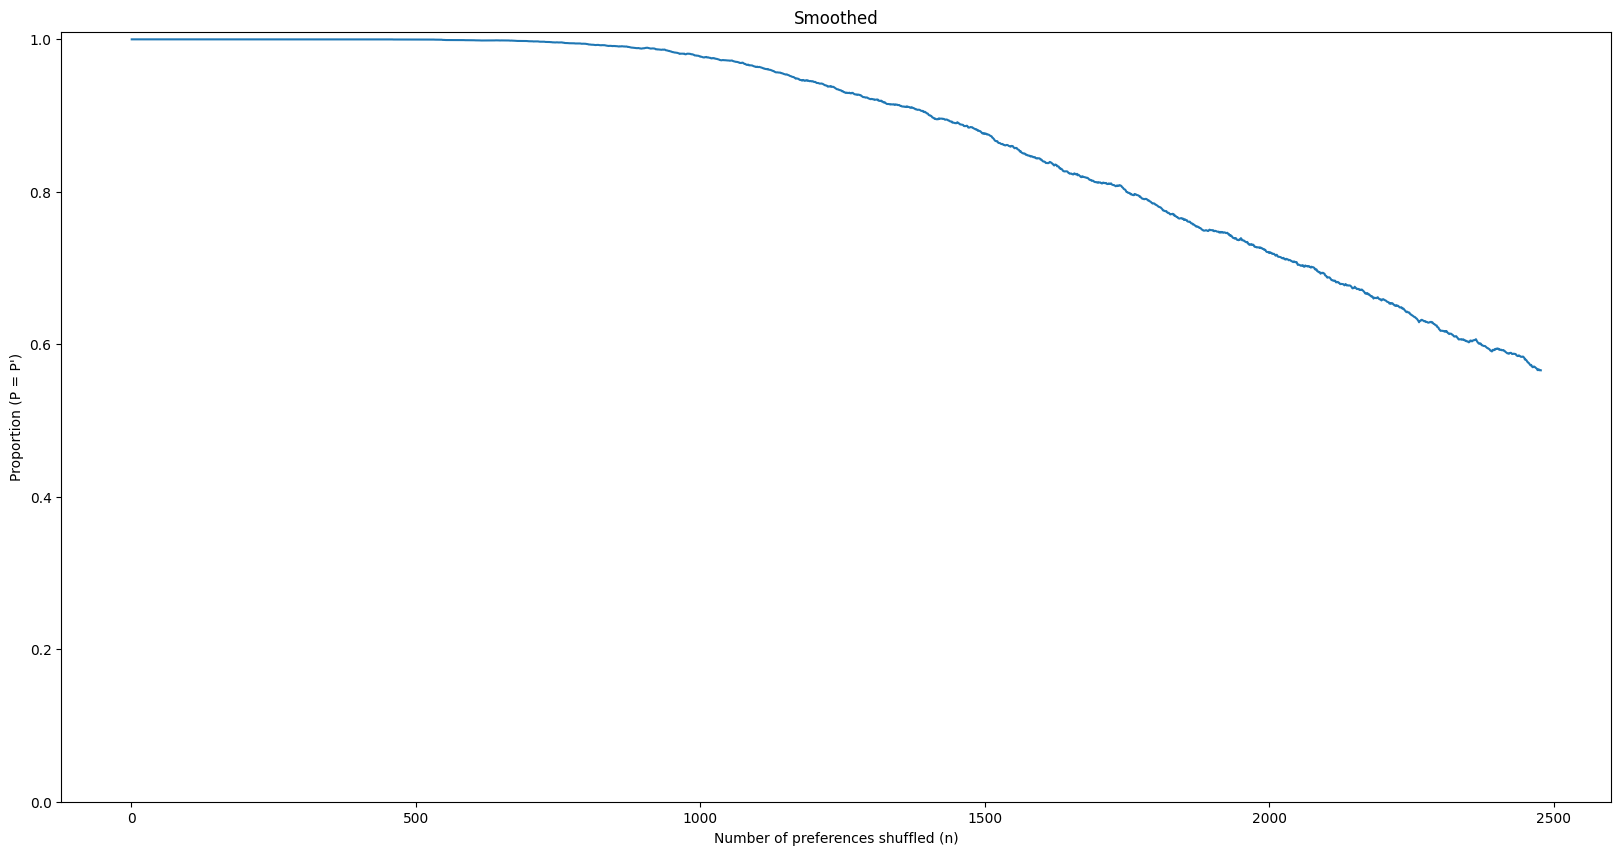

In [10]:
df = pd.read_csv('results.csv')

plt.figure(figsize=(20, 10))
proportions = df.groupby('n')['Match'].mean()
proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.show()

plt.figure(figsize=(20, 10))
smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()